In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import tensorly as tl
from tensorly.decomposition import tucker
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
data = pd.read_csv('ratings.txt')
data=data.dropna()
data['rating']=data['rating']/5
data = data.sort_values(by=['userid', 'itemid'])

In [3]:
dataplot = data.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataplot.iloc[:,4] = le.fit_transform(dataplot.iloc[:,4])
dataplot.iloc[:,5] = le.fit_transform(dataplot.iloc[:,5])
dataplot.iloc[:,3] = le.fit_transform(dataplot.iloc[:,3])
data2=dataplot.copy()
dataplot.iloc[:,1] = le.fit_transform(dataplot.iloc[:,1])

In [4]:
data2.head()

,userid,itemid,rating,Time,Location,Companion
723,1001,tt0088763,0.6,1,0,1
731,1001,tt0088763,0.8,1,0,2
721,1001,tt0111161,0.4,1,0,1
729,1001,tt0111161,0.6,1,0,2
737,1001,tt0120338,0.2,1,1,0


In [5]:
user_id = data2['userid'].unique()
item_id = data2['itemid'].unique()
location = data2['Location'].unique()
companion = data2['Companion'].unique()
time = data2['Time'].unique()

In [6]:
def mapping(ids):
    count = 0
    keys_u = ids
    map_array = {}
    for i in keys_u:
        map_array[i] = count
        count = count + 1
    return map_array

In [7]:
map_users = mapping(user_id)
map_items = mapping(item_id)
map_loc = mapping(location)
map_tim = mapping(time)
map_com = mapping(companion)

In [8]:
tensor5d = np.zeros([len(user_id),len(item_id),len(location),len(time),len(companion)])

In [9]:
for i in range(data2.shape[0]):
    idx1 = map_users[data2.iloc[i,0]]
    idx2 = map_items[data2.iloc[i,1]]
    idx3 = map_loc[data2.iloc[i,4]]
    idx4 = map_tim[data2.iloc[i,3]]
    idx5 = map_com[data2.iloc[i,5]]
    rat = data2.iloc[i,2]
    tensor5d[idx1,idx2,idx3,idx4,idx5] = rat

In [10]:
factors5d = tucker(tensor5d , ranks=[35,35,2,2,3])

In [11]:
U1 = factors5d[1][0]
I1 = factors5d[1][1]
C1 = factors5d[1][2]
C2 = factors5d[1][3]
C3 = factors5d[1][4]

In [12]:
C3.shape

(3, 3)

In [13]:
wcss = []
for i in range(1,81):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(U1)
    wcss.append(kmeans.inertia_)

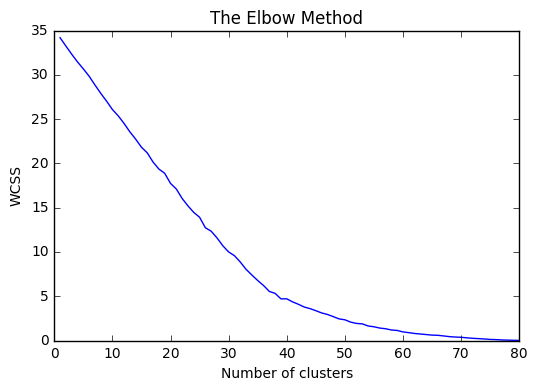

In [14]:
plt.plot(range(1, 81), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=36, random_state=0)
y1 = kmeans.fit_predict(U1)
kmeans = KMeans(n_clusters=40, random_state=0)
y2 = kmeans.fit_predict(U1)
kmeans = KMeans(n_clusters=37, random_state=0)
y3 = kmeans.fit_predict(U1)
kmeans = KMeans(n_clusters=38, random_state=0)
y4 = kmeans.fit_predict(U1)

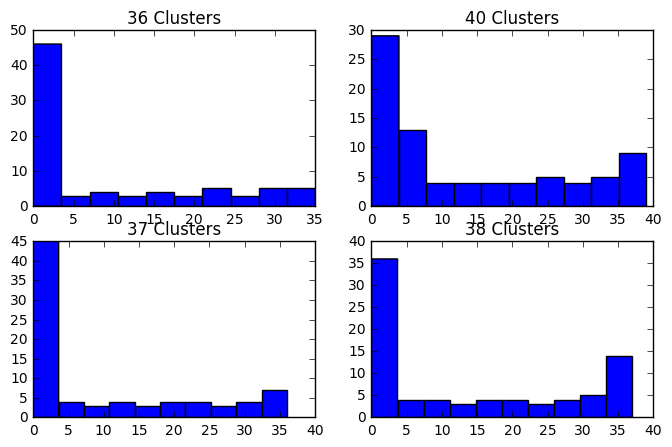

In [16]:
fig, ax = plt.subplots(2,2, figsize=(8, 5))
ax[0,0].hist(y1)
ax[0,0].set_title("36 Clusters")
ax[0,1].hist(y2)
ax[0,1].set_title("40 Clusters")
ax[1,0].hist(y3)
ax[1,0].set_title("37 Clusters")
ax[1,1].hist(y4)
ax[1,1].set_title("38 Clusters")

In [188]:
current_user = 1035
index_user = map_users[current_user]
cluster_user = y2[index_user]

In [189]:
user_id

array([1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1011, 1014,
       1015, 1016, 1018, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033,
       1034, 1035, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045,
       1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056,
       1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067,
       1068, 1069, 1070, 1071, 1074, 1075, 1076, 1077, 1078, 1079, 1082,
       1084, 1087, 1097, 1098, 1105, 1107, 1109, 1112, 1113, 1114, 1115,
       1116, 1119, 1120, 1122], dtype=int64)

In [190]:
y2

array([ 5, 36,  1, 11,  5, 29,  1,  1,  5, 36,  5, 20,  1,  1, 32,  5, 37,
       25,  1, 12,  4,  7,  1,  1,  1, 36, 35,  1, 13, 21, 19, 31,  1,  1,
        1,  1,  5, 10, 16,  0, 39,  5, 26, 39,  5, 23,  1, 33,  1, 28,  1,
        1,  5,  1,  1,  1,  2, 34, 17,  1, 36,  6, 34,  3, 22,  8,  5, 15,
       24,  9, 36,  1, 26, 27,  1,  1, 30, 18, 38, 14,  1])

In [191]:
cluster_user

1

In [192]:
sim_user_id = []
for i in range(len(y2)):
    if(y2[i]==cluster_user and user_id[i]!=current_user):
        sim_user_id.append(user_id[i])

In [193]:
sim_user_id.append(current_user)

In [194]:
current_context1 = 0
current_context2 = 1
current_context3 = 1

In [195]:
index_context1 = map_loc[current_context1]
index_context2 = map_tim[current_context2]
index_context3 = map_com[current_context3]

In [196]:
matrix_context = tensor5d[:,:,index_context1,index_context2,index_context3]

In [197]:
matrix_context.shape

(81, 79)

In [198]:
cluster=[]
for i in range(len(user_id)):
    if y2[i]==cluster_user and i!=index_user :
        cluster.append(i)

In [199]:
len(cluster)

25

In [200]:
similar_users = []
for i in cluster:
    similar_users.append(matrix_context[i])
su = similar_users.copy()
su.append(matrix_context[map_users[current_user]])

In [201]:
similar_users = np.array(similar_users)

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.4,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.6,  0. ,  0. ,  0. ,
         0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.4,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.6,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0.

In [202]:
similar_users.shape

(25, 79)

In [203]:
relevant_items=[]
count = 0
for i in range(len(item_id)):
    for j in range(len(cluster)):
        if(similar_users[j][i]>0.5):
            count = count + 1
    relevant_items.append(count)
    count = 0

In [204]:
itemx=[]
for i in range(len(relevant_items)):
    temp=[]
    temp.append(item_id[i])
    temp.append(relevant_items[i])
    itemx.append(temp)

In [205]:
itemx = np.array(itemx)
itemx

array([['tt0088763', '0'],
       ['tt0111161', '1'],
       ['tt0120338', '1'],
       ['tt0133093', '0'],
       ['tt0211915', '1'],
       ['tt0266543', '2'],
       ['tt0362165', '0'],
       ['tt0378194', '0'],
       ['tt0405422', '0'],
       ['tt0462538', '0'],
       ['tt1232829', '0'],
       ['tt1453405', '0'],
       ['tt1707386', '1'],
       ['tt0109830', '1'],
       ['tt0114369', '0'],
       ['tt0367594', '0'],
       ['tt0382625', '2'],
       ['tt0993846', '1'],
       ['tt2557490', '0'],
       ['tt3793764', '1'],
       ['tt0110357', '0'],
       ['tt0114148', '0'],
       ['tt0120912', '0'],
       ['tt0454876', '1'],
       ['tt1099212', '1'],
       ['tt1291150', '0'],
       ['tt0110475', '0'],
       ['tt0125439', '0'],
       ['tt0138097', '0'],
       ['tt0181689', '0'],
       ['tt0289879', '0'],
       ['tt0293662', '1'],
       ['tt0319262', '0'],
       ['tt0327084', '0'],
       ['tt0489099', '0'],
       ['tt0800369', '0'],
       ['tt0945513', '0'],
 

In [206]:
# sorting in reverse(top 10 iStems)
itemx = itemx[itemx[:,1].argsort()[::-1]]

In [207]:
itemx[0:10, :]

array([['tt1133985', '3'],
       ['tt0382625', '2'],
       ['tt1657301', '2'],
       ['tt1478338', '2'],
       ['tt0213149', '2'],
       ['tt0266543', '2'],
       ['tt3793764', '1'],
       ['tt0232500', '1'],
       ['tt0993846', '1'],
       ['tt0816199', '1']], 
      dtype='<U9')

In [208]:
sim_user_id = sim_user_id[:-1]


In [209]:
su_mean=[]
count=0
mean=0
for i in range(len(su)):
    for j in range(len(item_id)):
        if su[i][j]:
            count = count + 1
            mean = mean + su[i][j]
    if mean and count:
        su_mean.append(mean/count)
    else:
        su_mean.append(0)
    mean=0
    count=0

In [210]:
import math
corr_matrix=[]
corr_m = []
sumxy=0
sumyy2=0
sumxx2=0
corr=0
for i in range(len(su)):
    for j in range(len(su)):
        for k in range(len(item_id)):
            if su[i][k] and su[j][k]:
                sumxy= sumxy + (su[i][k]-su_mean[i])*(su[j][k]-su_mean[j])
                sumxx2= sumxx2 + (su[i][k]-su_mean[i])*(su[i][k]-su_mean[i])
                sumyy2= sumyy2 + (su[j][k]-su_mean[j])*(su[j][k]-su_mean[j])
        if sumxx2 and sumyy2 :
            corr=sumxy/math.sqrt(sumxx2*sumyy2)
        else:
            corr=0
        corr_m.append(corr)
        sumxy=0
        sumyy2=0
        sumxx2=0
    corr_matrix.append(corr_m)
    corr_m = []

In [211]:
corr_matrix = np.array(corr_matrix)
corr_matrix

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       

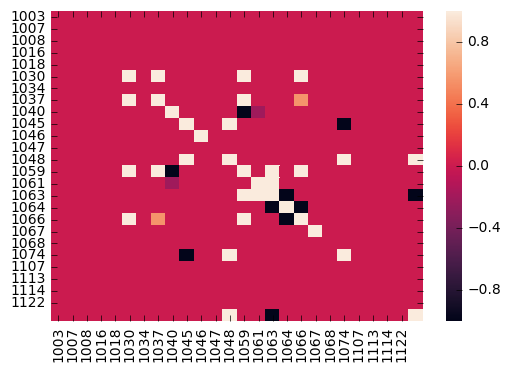

In [212]:
import seaborn as sns
sns.heatmap(corr_matrix, xticklabels=sim_user_id, yticklabels=sim_user_id)

In [213]:
su=np.array(su)
su.shape

(26, 79)

In [214]:
similarities = corr_matrix[9]
similarities

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.])

In [215]:
similarities = similarities[:-1]
similarities

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.])

In [216]:
sim_user_id

[1003,
 1007,
 1008,
 1016,
 1018,
 1030,
 1034,
 1037,
 1040,
 1045,
 1046,
 1047,
 1048,
 1059,
 1061,
 1063,
 1064,
 1066,
 1067,
 1068,
 1074,
 1107,
 1113,
 1114,
 1122]

In [217]:
su_mean=[]
count=0
mean=0
for i in range(len(su)):
    for j in range(len(item_id)):
        if su[i][j]:
            count = count + 1
            mean = mean + su[i][j]
    if mean and count:
        su_mean.append(mean/count)
    else:
        su_mean.append(0)
    mean=0
    count=0
su_mean

[0,
 0,
 0,
 0,
 0,
 0.20000000000000004,
 0,
 0.96666666666666667,
 0.66666666666666663,
 0.40000000000000008,
 0.40000000000000008,
 0,
 0.66666666666666663,
 0.56666666666666665,
 0.88000000000000012,
 0.70000000000000007,
 0.53333333333333333,
 0.23999999999999999,
 0.20000000000000004,
 0,
 0.34999999999999998,
 0,
 0.59999999999999998,
 0,
 0,
 0.40000000000000008]

In [218]:
predicted_ratings=[]

for i in range(len(item_id)):
    temp = 0
    summ = 0
    for j in range(len(similar_users)):
        if similar_users[j][i]:
            summ = summ + similarities[j]
            temp = temp + (similarities[j]*(similar_users[j][i]-su_mean[j]))
    if summ:
        pred = su_mean[-1] + (temp/summ)
    else:
        pred = su_mean[-1] + temp
    if pred >1:
        pred = 1
    elif pred<=0:
        pred = 0.2
        
    predicted_ratings.append(pred)
    

In [219]:
for i in range(len(item_id)):
    print(su[9][i],',',predicted_ratings[i])

    
   

0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.333333333333
0.0 , 0.4
0.0 , 0.4
0.2 , 0.2
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.45
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.4 , 0.366666666667
0.0 , 0.283333333333
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4
0.6 , 0.75
0.0 , 0.4
0.0 , 0.25
0.0 , 0.4
0.0 , 0.4
0.0 , 0.4


In [220]:
predicted_ratings=np.array(predicted_ratings)
len(su[9])

79

In [221]:
err = 0
count = 0
for i in range(len(su[len(su)-1])):
    if su[len(su)-1][i]:
        err = err + abs(su[len(su)-1][i]-predicted_ratings[i])
        count = count + 1
if count:
    mae = err/count
else:
    mae = 100000000000000

In [222]:
mae

0.022222222222222237